In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = uproot.open("FASERnu-muplus-skimmed.root")
g = uproot.open("FASERnu-muminus-skimmed.root")
h = uproot.open("pilotdata_skim.root")

In [3]:
# Get the data array for the last 30 layers of the skimmed muplus sample
#xarray = np.float64(f["ntuple"]["x"].array())
#print("x")
#yarray = np.float64(f["ntuple"]["y"].array())
#print("y")
#zarray = np.float64(f["ntuple"]["z"].array())
#print("z")
pxarray = np.float64(f["ntuple"]["px"].array())
print("px")
pyarray = np.float64(f["ntuple"]["py"].array())
print("py")
pzarray = np.float64(f["ntuple"]["pz"].array())
print("pz")
#izarray = np.float64(f["ntuple"]["iz"].array())
#print("iz")
#truthclusterarray = np.float64(f["ntuple"]["truthcluster"].array())
#pdgidarray = np.float64(f["ntuple"]["pdgid"].array())
muplusarray = np.vstack((pxarray,pyarray,pzarray)).T
#muplusarray = muplusarray[muplusarray[:,6]>70]
# Get the data array for the last 30 layers of the skimmed muminus sample
#xarray = np.float64(g["ntuple"]["x"].array())
#print("x")
#yarray = np.float64(g["ntuple"]["y"].array())
#print("y")
#zarray = np.float64(g["ntuple"]["z"].array())
#print("z")
pxarray = np.float64(g["ntuple"]["px"].array())
print("px")
pyarray = np.float64(g["ntuple"]["py"].array())
print("py")
pzarray = np.float64(g["ntuple"]["pz"].array())
print("pz")
#izarray = np.float64(g["ntuple"]["iz"].array())
#print("iz")
#truthclusterarray = np.float64(g["ntuple"]["truthcluster"].array())
#pdgidarray = np.float64(g["ntuple"]["pdgid"].array())
muminusarray = np.vstack((pxarray,pyarray,pzarray)).T
#muminusarray = muminusarray[muminusarray[:,6]>70]
# Get the data array for the pilot sample
#xarray = np.float64(h["pilot"]["x"].array())
#print("x")
#yarray = np.float64(h["pilot"]["y"].array())
#print("y")
#zarray = np.float64(h["pilot"]["z"].array())
#print("z")
txarray = np.float64(h["pilot"]["tx"].array())
print("tx")
tyarray = np.float64(h["pilot"]["ty"].array())
print("ty")
#chi2array = np.float64(h["pilot"]["chi2"].array())
#izarray = np.float64(h["pilot"]["iz"].array())
#print("iz")
#pilotarray = np.vstack((xarray,yarray,zarray,txarray,tyarray,izarray,chi2array)).T
pilotarray = np.vstack((txarray,tyarray)).T
muplustxarray = muplusarray[:,0:1]/muplusarray[:,2:3]
muplustyarray = muplusarray[:,1:2]/muplusarray[:,2:3]
muminustxarray = muminusarray[:,0:1]/muminusarray[:,2:3]
muminustyarray = muminusarray[:,1:2]/muminusarray[:,2:3]

px
py
pz
px
py
pz
tx
ty


In [6]:
# Apply correction to MC data
thetaxoffset = -0.008
thetayoffset = 0.028
muplustxarraycorr = np.tan(np.arctan(muplustxarray)+thetaxoffset)
muplustyarraycorr = np.tan(np.arctan(muplustyarray)+thetayoffset)
muminustxarraycorr = np.tan(np.arctan(muminustxarray)+thetaxoffset)
muminustyarraycorr = np.tan(np.arctan(muminustyarray)+thetayoffset)
print("finished")

finished


In [4]:
muminustxcutarray = muminustxarray[muminustxarray<0.1]
muminustxcutarray = muminustxcutarray[muminustxcutarray>-0.1]
muminustycutarray = muminustyarray[muminustyarray<0.1]
muminustycutarray = muminustycutarray[muminustycutarray>-0.1]

In [7]:
muminustxcutarraycorr = muminustxarraycorr[muminustxarraycorr<0.1]
muminustxcutarraycorr = muminustxcutarraycorr[muminustxcutarraycorr>-0.1]
muminustycutarraycorr = muminustyarraycorr[muminustyarraycorr<0.1]
muminustycutarraycorr = muminustycutarraycorr[muminustycutarraycorr>-0.1]
print("finished")

finished


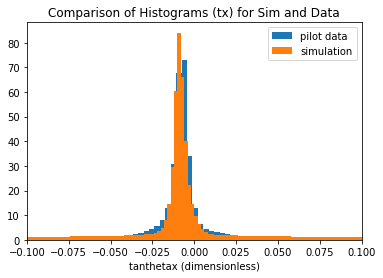

In [8]:
plt.title("Comparison of Histograms (tx) for Sim and Data")
plt.xlabel("tanthetax (dimensionless)")
plt.xlim(-0.1,0.1)
#plt.yscale("log")
plt.hist(pilotarray[:,0],bins=1000,density=1,label="pilot data")
plt.hist(muminustxcutarraycorr,bins=100,density=1,label="simulation")
plt.legend()

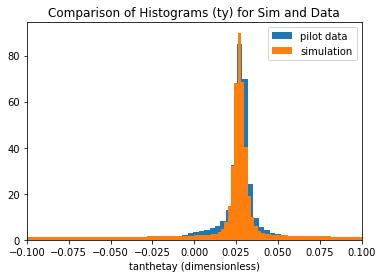

In [9]:
plt.title("Comparison of Histograms (ty) for Sim and Data")
plt.xlabel("tanthetay (dimensionless)")
plt.xlim(-0.1,0.1)
#plt.yscale("log")
plt.hist(pilotarray[:,1],bins=1000,density=1,label="pilot data")
plt.hist(muminustycutarraycorr,bins=100,density=1,label="simulation")
plt.legend()

(0, 100)

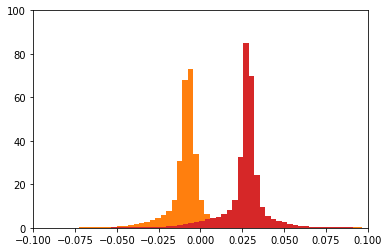

In [39]:
x = plt.hist(pilotarray[:,0],bins=1000,density=1,label="pilot data")[0]
xbins = np.delete(plt.hist(pilotarray[:,0],bins=1000,density=1,label="pilot data")[1],1000)
y = plt.hist(pilotarray[:,1],bins=1000,density=1,label="pilot data")[0]
ybins = np.delete(plt.hist(pilotarray[:,1],bins=1000,density=1,label="pilot data")[1],1000)
plt.xlim(-0.1,0.1)
plt.ylim(0,100)

C:\Users\User\Added_Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


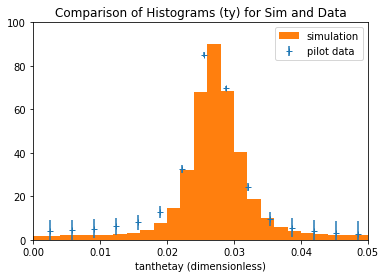

In [38]:
plt.title("Comparison of Histograms (ty) for Sim and Data")
plt.xlabel("tanthetay (dimensionless)")
plt.xlim(-0,0.05)
plt.ylim(0,100)
#plt.yscale("log")
plt.errorbar(ybins,y,yerr=1/np.sqrt(x),marker='+',ls='none',label="pilot data")
plt.hist(muminustycutarraycorr,bins=100,density=1,label="simulation")
plt.legend()

C:\Users\User\Added_Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


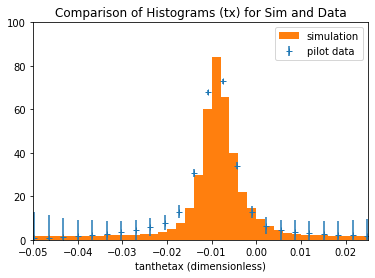

In [42]:
plt.title("Comparison of Histograms (tx) for Sim and Data")
plt.xlabel("tanthetax (dimensionless)")
plt.xlim(-0.05,0.025)
plt.ylim(0,100)
#plt.yscale("log")
plt.errorbar(xbins,x,yerr=1/np.sqrt(x),marker='+',ls='none',label="pilot data")
plt.hist(muminustxcutarraycorr,bins=100,density=1,label="simulation")
plt.legend()

In [32]:
muvararray = np.vstack((muplusvararray,muminusvararray))

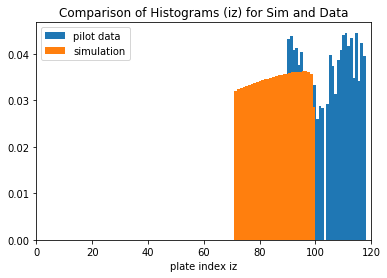

In [17]:
plt.title("Comparison of Histograms (iz) for Sim and Data")
plt.xlabel("plate index iz")
plt.xlim(0,120)
plt.hist(pilotarray[:,5],bins=30,density=1,label="pilot data")
plt.hist(muminusarray[muminusarray[:,6]>70][:,6],bins=30,density=1,label="simulation")
plt.legend()

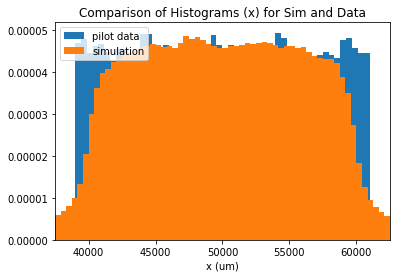

In [38]:
plt.title("Comparison of Histograms (x) for Sim and Data")
plt.xlabel("x (um)")
plt.xlim(37500,62500)
plt.hist(pilotarray[:,0],bins=50,density=1,label="pilot data")
plt.hist(muvararray[:,0],bins=300,density=1,label="simulation")
plt.legend()

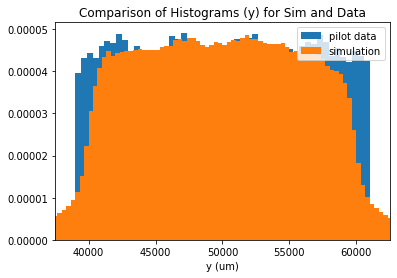

In [39]:
plt.title("Comparison of Histograms (y) for Sim and Data")
plt.xlabel("y (um)")
plt.xlim(37500,62500)
plt.hist(pilotarray[:,1],bins=50,density=1,label="pilot data")
plt.hist(muvararray[:,1],bins=300,density=1,label="simulation")
plt.legend()

In [58]:
np.amax(muvararray[:,3])

6023297.084598306

(array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 4.00000000e+00,
        3.00000000e+00, 6.00000000e+00, 1.30000000e+01, 9.20000000e+01,
        1.02605902e+08, 7.70000000e+01, 1.20000000e+01, 7.00000000e+00,
        3.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

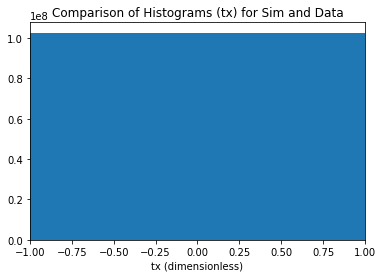

In [55]:
plt.title("Comparison of Histograms (tx) for Sim and Data")
plt.xlabel("tx (dimensionless)")
plt.xlim(-1,1)
#plt.hist(pilotarray[:,3],bins=1000,density=1,label="pilot data")
plt.hist(muvararray[:,3],bins=100,label="simulation")
#plt.legend()

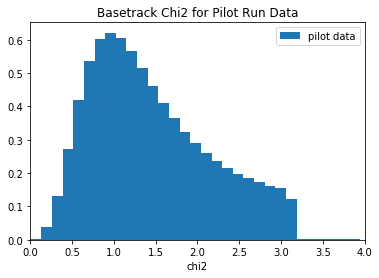

In [19]:
plt.title("Basetrack Chi2 for Pilot Run Data")
plt.xlabel("chi2")
plt.xlim(0,4)
plt.hist(pilotarray[:,6],bins=100,density=1,label="pilot data")
plt.legend()

In [ ]:
plt.title("Comparison of Histograms (ty) for Sim and Data")
plt.xlabel("ty (dimensionless)")
plt.hist(pilotarray[:,4],bins=100,density=1,label="pilot data")
plt.hist(muvararray[:,4],bins=100,density=1,label="simulation")
plt.legend()